In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Professor Daniel's code for displaying data frames but without displaying the variable names
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">{1}</div>""" 
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### <text style="background-color: #90EE90; color:black">**Dataset Exploration**:</text> <text>Overall Look and General Information</text>

In [37]:
data = pd.read_csv("churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [38]:
# Getting an overview of the size, possible presence of NaN values, and the data types
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### **Further steps**: 
- All binary columns should be converted into 1 and 0 (if they aren't yet) because many statistical tools work with numeric values;
- Columns with 3/4 values (`PhoneService`, etc.) will be converted into 3/4 dummy variables to be analyzed as separate features;
- `TotalCharges` should be set as float data type, not string.
- A new variable `Number_of_Services_Used` should be defined by adding the number of services each customer is subscribed to to see whether there is any relationship between this number and the churn rate.

### <text style="background-color: #90EE90; color:black">**Data Transformation**</text>

##### Converting in the same `for loop` for efficiency:
- Binary columns into dummy variables
- Three- and four-value columns into the respective number of dummy variables

In [39]:
data.gender = data.gender.apply(lambda x: 1 if x == 'Male' else 0) # Replacing Male with 1 and Female with 0)

In [40]:
for column in data.columns:
    if data[column].dtype == 'object':  # Looking for 'object' columns
        unique_values = set(data[column].unique())  
        if unique_values.issubset({'Yes', 'No'}):  # Checking if unique values are Yes and No
            data[column] = data[column].apply(lambda x: 1 if x == 'Yes' else 0) # Replacing Yes with 1 and No with 0
        elif len(unique_values) in (3,4):  # Checking if there are exactly three/four unique values - all the columns 
            # Creating dummy variables for the column
            dummies = pd.get_dummies(data[column], prefix=column)
            # Concatenating the dummy variables and drop the original column
            data = pd.concat([data, dummies], axis=1)
            data.drop(column, axis=1, inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   object 
 10  Churn                                    7043 no

Checking how many customers are there without the internet or phone service:

In [42]:
customers_with_no_internet = data.InternetService_No.sum()
customers_with_no_phone = data.PhoneService.size - data.PhoneService.sum()
print(f"There are {customers_with_no_internet} customers with no internet and {customers_with_no_phone} customers with no phone service.")

There are 1526 customers with no internet and 682 customers with no phone service.


Ensuring the correspondence of the all the dummy variables with No internet service with `InternetService_No`:


In [43]:
columns_to_check = [column for column in data.columns if "No internet service" in column]
columns_to_check.append('InternetService_No')
checking_correspondence_internet = data[data[columns_to_check].all(axis=1)]
checking_correspondence_internet[columns_to_check]
# The output confirms: ALL customers in InternetService_No represent the No internet service customers in other dummy variables

,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,InternetService_No
11,1,1,1,1,1,1,1
16,1,1,1,1,1,1,1
21,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1
33,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
7017,1,1,1,1,1,1,1
7019,1,1,1,1,1,1,1
7020,1,1,1,1,1,1,1
7030,1,1,1,1,1,1,1


Ensuring the correspondence of the dummy variable with No phone service with zeros of the `PhoneService`:

In [44]:
# The fastest way to do it is just by summing the ones in the first column and comparing it to customers_with_no_phone variable
MultipleLines_No_phone_service_total = data["MultipleLines_No phone service"].sum()
print(f"Comparison: {MultipleLines_No_phone_service_total} : {customers_with_no_phone}")

Comparison: 682 : 682


In [45]:
# Trying to convert the TotalCharges to column, it appeared that some rows had an empty space there
data[data.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,4472-LVYGI,0,0,1,1,0,0,1,52.55,,...,1,0,0,0,0,1,1,0,0,0
753,3115-CZMZD,1,0,0,1,0,1,0,20.25,,...,0,1,0,0,0,1,0,0,0,1
936,5709-LVOEQ,0,0,1,1,0,1,0,80.85,,...,0,0,1,0,0,1,0,0,0,1
1082,4367-NUYAO,1,0,1,1,0,1,0,25.75,,...,0,1,0,0,0,1,0,0,0,1
1340,1371-DWPAZ,0,0,1,1,0,0,0,56.05,,...,1,0,0,0,0,1,0,1,0,0
3331,7644-OMVMY,1,0,1,1,0,1,0,19.85,,...,0,1,0,0,0,1,0,0,0,1
3826,3213-VVOLG,1,0,1,1,0,1,0,25.35,,...,0,1,0,0,0,1,0,0,0,1
4380,2520-SGTTA,0,0,1,1,0,1,0,20.00,,...,0,1,0,0,0,1,0,0,0,1
5218,2923-ARZLG,1,0,1,1,0,1,1,19.70,,...,0,1,0,0,1,0,0,0,0,1
6670,4075-WKNIU,0,0,1,1,0,1,0,73.35,,...,1,0,0,0,0,1,0,0,0,1


The query above shows that an empty space corresponds to very recent customers who haven't paid even for 1 month yet. Therefore, these empty spaces will be replaced with a zero before transforming the column to float:

In [46]:
data.TotalCharges = data.TotalCharges.replace(' ', 0)
data.TotalCharges = data.TotalCharges.astype(float)

Creating a `Number_of_Services_Used` column:

In [47]:
# First, creating a column to represent customers with any type of internet service to calculate the variable of interest (customers cannot have two different internet services at the same time)
data["InternetService_Yes"] = data.InternetService_DSL+data["InternetService_Fiber optic"]

# Creating a list of columns that represent different services 
services_columns = ['PhoneService', 'MultipleLines_Yes', 'InternetService_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']

# Creating a new column to represent the number of services each customer has
data['Number_of_Services_Used'] = data[services_columns].apply(lambda x: (x == 1).sum(), axis=1)

Since all dummy variables with `No internet service` correspond to `InternetService_No` (likewise for `MultipleLines_No phone service` and the zeroes of `PhoneService`), these column duplicates should be dropped. `InternetService_Yes` should also be dropped because the two separate internet service categories can be more insightful.

In [48]:
columns_to_drop = columns_to_check
columns_to_drop.remove('InternetService_No') # Removing the column used for checking which must be kept
columns_to_drop.extend(["MultipleLines_No phone service","InternetService_Yes"])
data = data.drop(columns=columns_to_drop) # Dropping the duplicate columns
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Number_of_Services_Used
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,1,0,0,0,0,1,0,2
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,1,0,0,0,0,1,4
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,1,0,0,0,0,0,1,4
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,1,0,1,0,0,0,4
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,0,1,0,1,0,0,0,0,1,8
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,0,1,0,1,0,0,1,0,0,7
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,1,0,1,0,0,0,0,1,0,2
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,1,0,1,0,0,0,0,0,1,3


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

##### The updated dataset information shows that all columns of potential interest are numeric (int64, float64, or uint 8 - the latter being the default data type of of the `pd.get_dummies()` function which occupies less space and is beneficial for large datasets). The next step would be to conduct short exploratory analysis of the data with graphs and correlation matrix. 

### <text style="background-color: #90EE90; color:black">**Analysis**</text>

##### Constructing a **Correlation Matrix**

In [50]:
import re

def format_variable_names(variable_name):
    """
    This function formats variable names for clearer visual display in all subsequent graphs
    Args:
        variable_name: variable name to be
    Returns:
        formatted variable name
    """
    formatted_name = variable_name.replace("_", " ")
    # Adding space before capital letters followed by lowercase letters, exclude all caps words like DSL:
    formatted_name = re.sub(r"(?<!\b)([A-Z])([a-z])", r" \1\2", formatted_name)
    # Capitalizing the first letter of every word
    formatted_name = formatted_name.title()
    # Since there is an acronym DSL (others could be added in the future), we create a list to just make them all capitalized again
    acronyms = ['DSL'] 
    for acronym in acronyms:
        formatted_name = formatted_name.replace(acronym.title(), acronym)
    return formatted_name


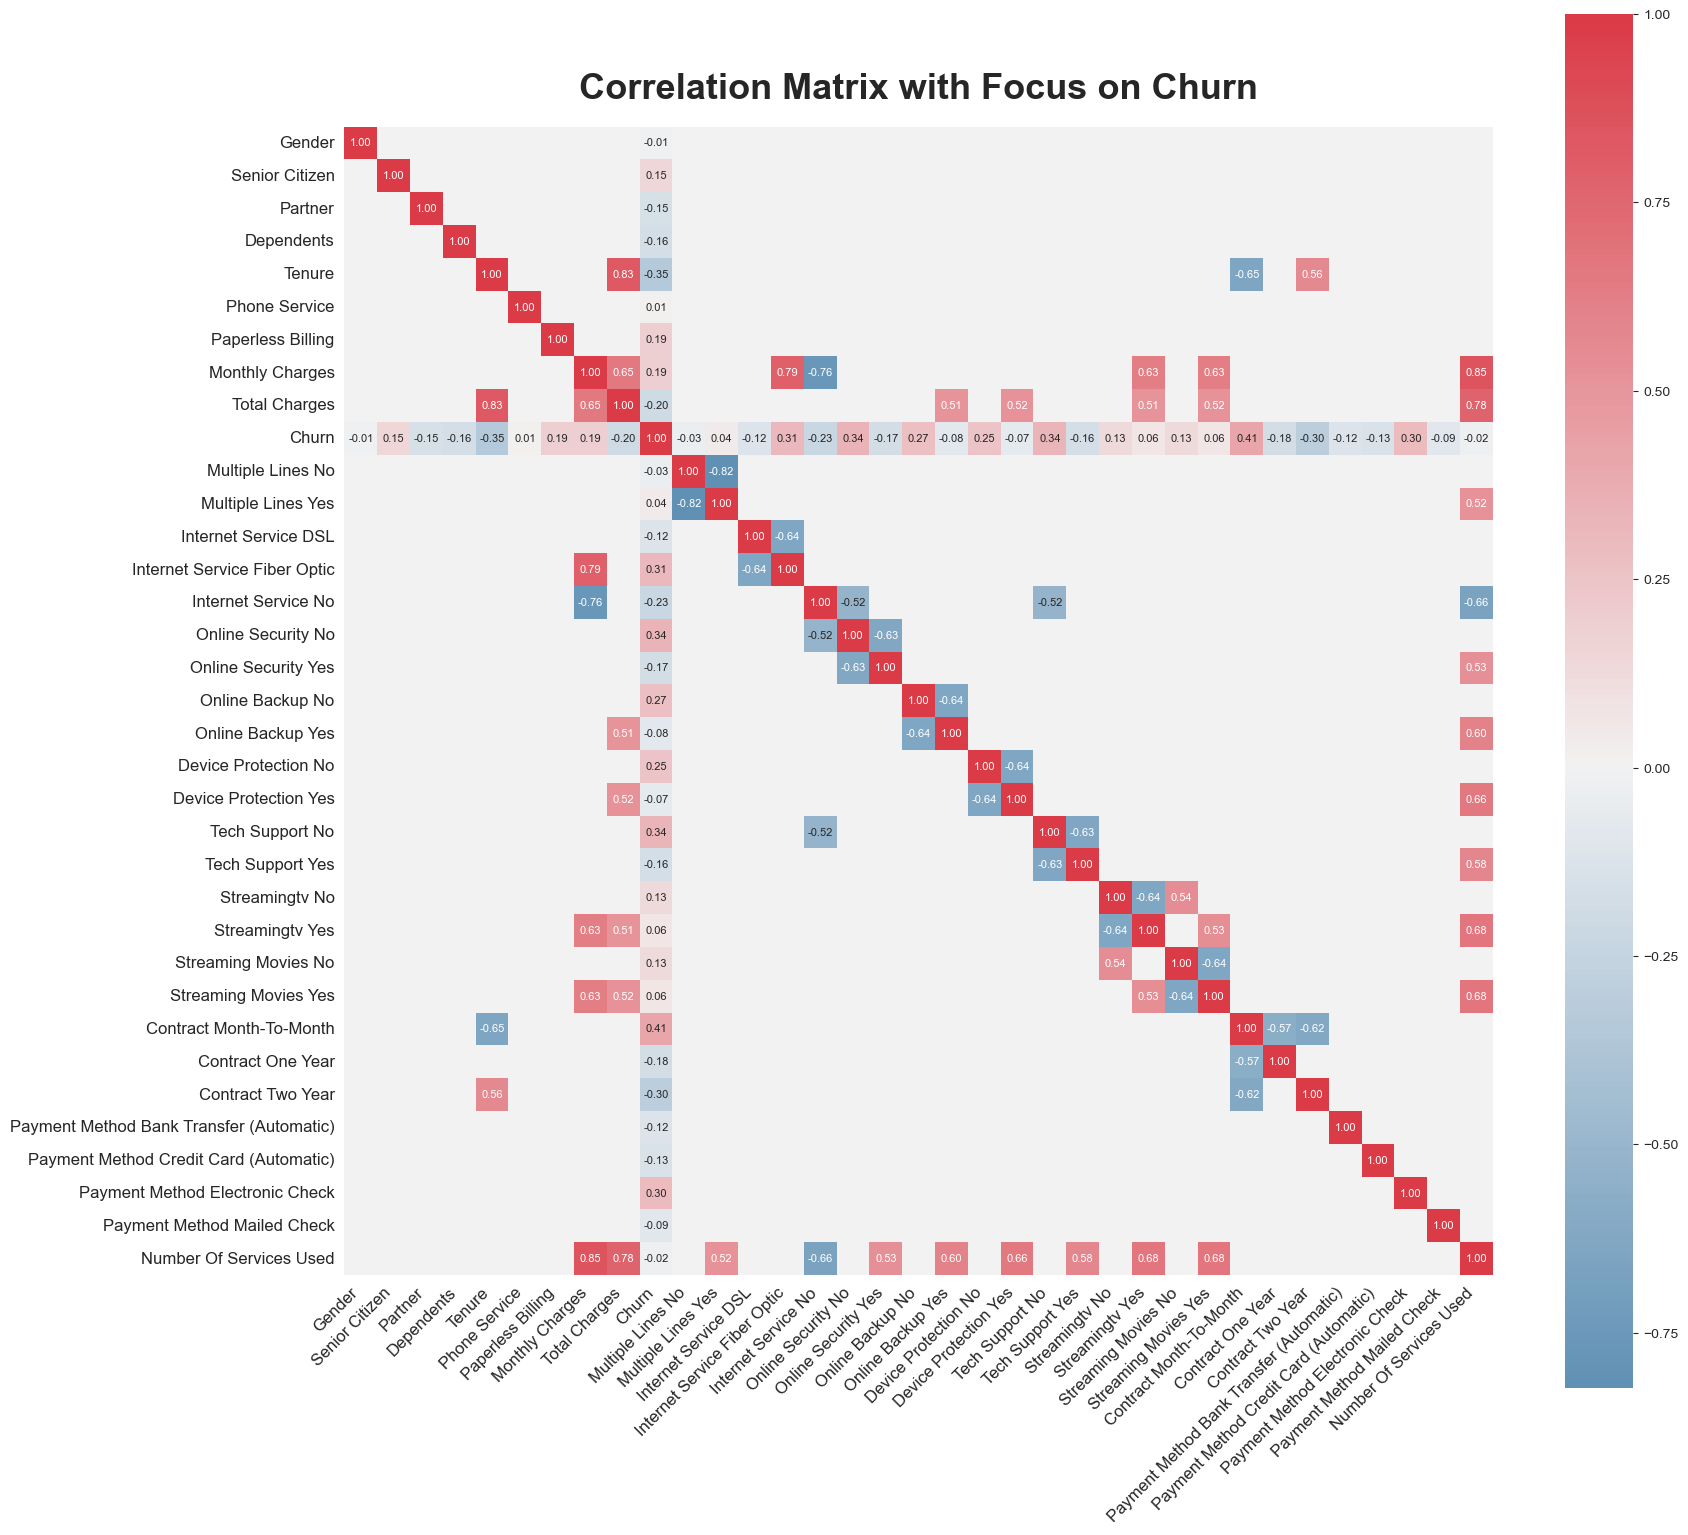

In [51]:
def correlation_matrix(data):
    """
    This function creates a correlation matrix, leaving the insignificant correlations out for visual clarity 
    but keeping the correlations for Churn present, since it is our variable of interest
    Args:
        data: the DataFrame with the data for analysis
    Returns:
        correlation_matrix, because it will be useful in further pieces of code
    """
    # Formatting the variable names
    formatted_variable_names = {var: format_variable_names(var) for var in data.columns}

    correlation_matrix = data.corr(numeric_only=True) # Considering numeric columns only
    plt.figure(figsize=(18, 16))  # Making the Correlation Matrix big enough

    # Setting the colors for elements and the palette
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    cmap.set_bad('#F2F2F2')  

    # Adjusting the mask and the correlation matrix if you only want to display significant correlations
    threshold = 0.5  # Creating a mask to display only the coefficients of potential interest
    significant_mask = np.abs(correlation_matrix) > threshold

    # The code below allows to display all correlation coefficients for Churn
    churn_index = correlation_matrix.columns.get_loc('Churn') 
    significant_mask.iloc[:, churn_index] = True
    significant_mask.iloc[churn_index, :] = True
        

    # Plotting the heatmap and showing only the cells with correlation above 0.5 or below -0.5
    sns.heatmap(correlation_matrix, mask=~significant_mask, cmap=cmap, center=0, square=True,
                annot=True, fmt=".2f", annot_kws={"size": 8})  

    # Setting the title and the x- and y-labels with the formatted variables
    plt.title('Correlation Matrix with Focus on Churn', fontsize=26, fontweight='bold', pad=20)
    plt.xticks(np.arange(len(correlation_matrix.columns)) + 0.5, [formatted_variable_names[column] for column in correlation_matrix.columns], rotation=45, ha='right', fontsize=12)
    plt.yticks(np.arange(len(correlation_matrix.index)) + 0.5, [formatted_variable_names[column] for column in correlation_matrix.index], fontsize=12)

    plt.tight_layout()
    plt.show()
    return correlation_matrix

corr_matrix = correlation_matrix(data)

##### **Intermediate conclusion**: there are no variables that have a strong correlation with churn. All variables have a correlation with churn of 0.41 or below. Number of services used shows no linear relationship, which will be explored further to see if a relationship still exists.

#### **Plotting**

##### Preliminary plotting of binary an then discrete variables to see what variables to work with further

In [52]:
columns_without_churn = corr_matrix.columns.drop('Churn').tolist() # Taking all variables from the corr. matrix but Churn
binary_variables = [column for column in columns_without_churn if data[column].nunique() == 2] # List of binary variables
discrete_variables = [column for column in columns_without_churn if data[column].nunique() > 2] # List with several-value variables

##### Creating a function to plot the given binary variables against `churn`. First, it was used to preliminarily plot all numeric variables against churn and see which variables look to have different churn rates for values of 0 and 1.

In [53]:
# Importing `mtick` to quickly annotate the y-axis ticks as percentages
import matplotlib.ticker as mtick

def binary_variables_against_churn(binary_variables, data):
    """
    This function plots binary variables against churn side by side, 3 per row
    Args:
        binary_variables: the list of binary variables to plot
        data: the DataFrame with the data for analysis
    Returns:
        None, because the function's purpose is just to output a plot/plots
    """
    sns.set_style("whitegrid") 

    # Setting the color palette to pastel - more visually appealing
    sns.set_palette("pastel")
    
    # Formatting all the binary variables to be used for better display:
    formatted_binary_variable_names = {var: format_variable_names(var) for var in binary_variables}
    
    rows = (len(binary_variables) + 2) // 3  # Determining the number of plot-rows depending on the number of columns
    fig, axes = plt.subplots(rows, 3, figsize=(17, rows * 6))  # Setting to display 3 plots per row and the size of each plot
    axes = axes.ravel()  # Flattening the array to simplify iteration

    # Creating a loop to plot a stacked bar chart for each binary variable against Churn and setting clear labels & title:
    for idx, column in enumerate(binary_variables):  
        # Transforming the variable name to make it look more visual for display
        formatted_name = formatted_binary_variable_names[column]
        # Calculating the churn rate (proportion of Churn = 1) for each category:
        churn_rate = data.groupby(column)['Churn'].value_counts(normalize=True).unstack()[1]

        # Creating a bar plot for churn rate with a title and labels:
        sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=axes[idx])
        axes[idx].set_title(f'Churn Rate & {formatted_name}', fontweight='bold', fontsize=15, pad=20)
        axes[idx].set_ylabel('Churn Rate', fontsize=14, labelpad=10)
        axes[idx].set_xlabel(formatted_name, fontsize=14, labelpad=10)
        axes[idx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0)) # Setting the y-axis ticks as percentages
        # Annotating the bars:
        for bar in axes[idx].patches:
            height = bar.get_height()
            axes[idx].annotate(f'{height:.0%}', (bar.get_x() + bar.get_width() / 2, height), 
                            ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

        sns.despine(ax=axes[idx]) # Removing the gray borders around each graph for a better look

    # Hiding the unused subplots so that they do not appear as empty squares:
    for ax in axes[idx+1:]:
        ax.set_visible(False)

    plt.tight_layout(pad=3.0, w_pad=6.0)
    plt.show()

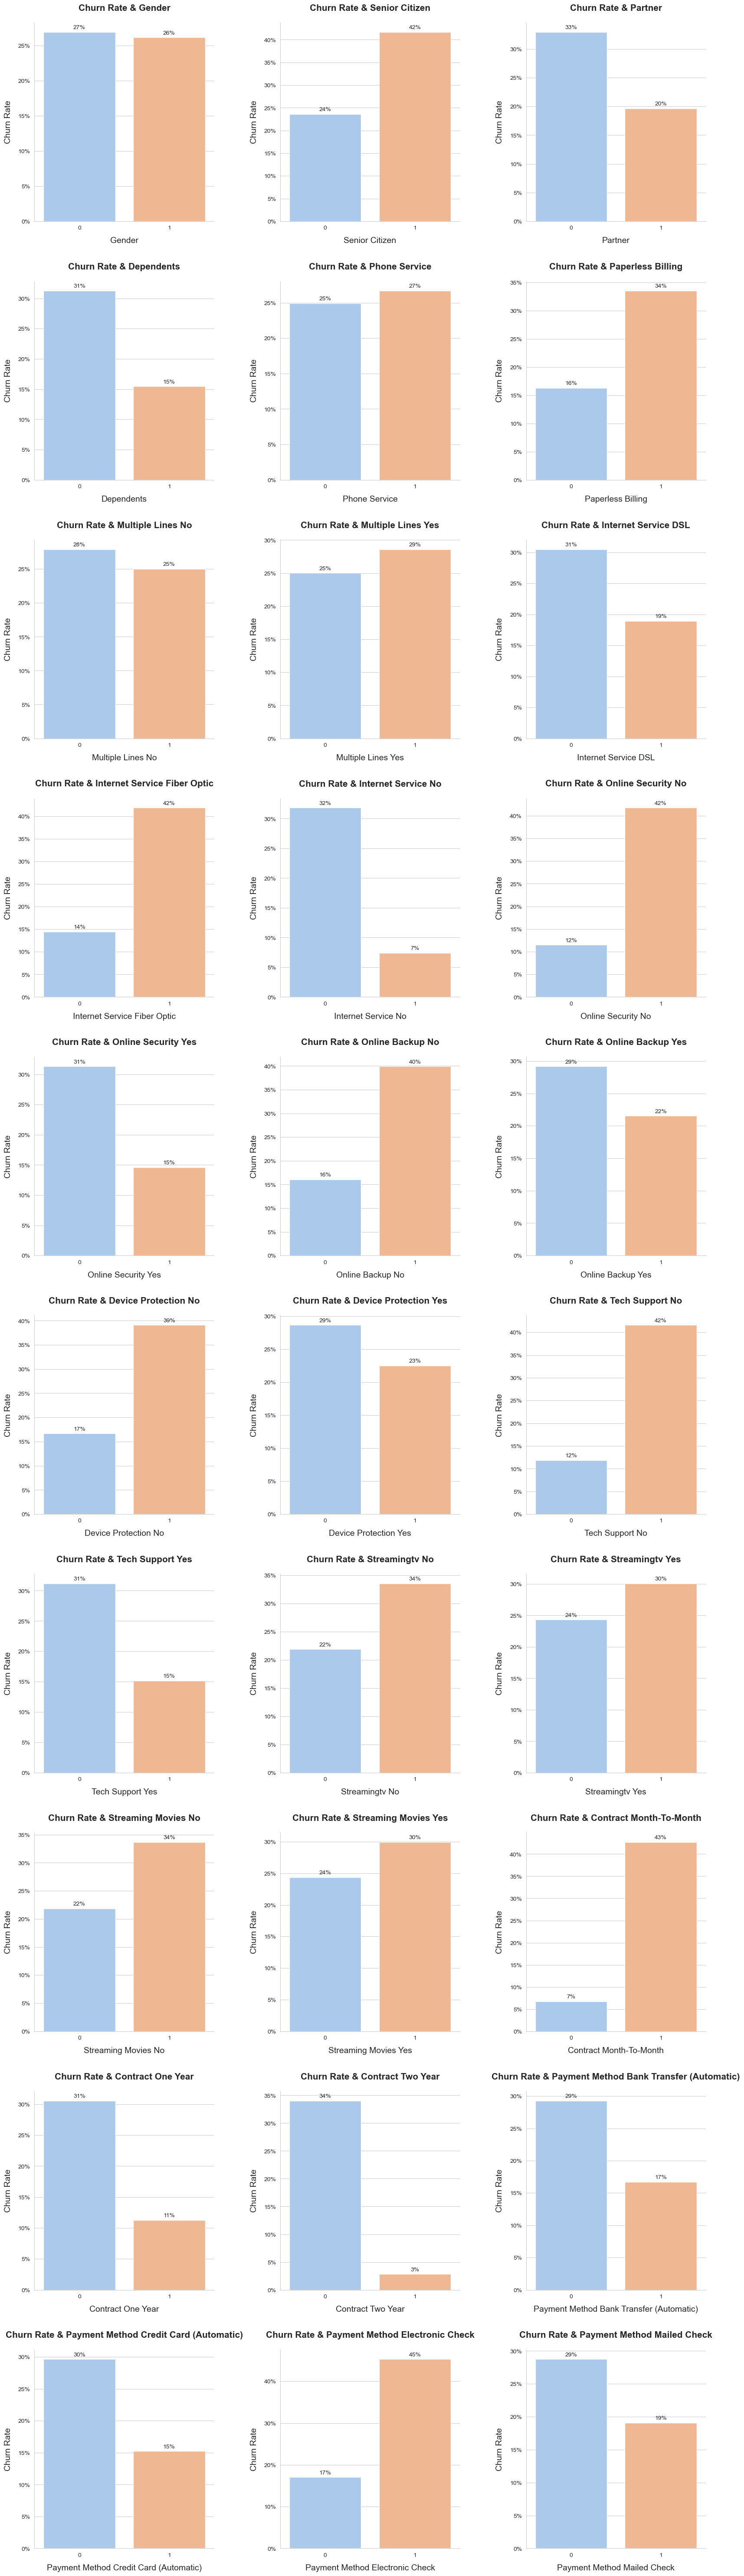

In [54]:
# Preliminary plotting: calling the plotting function to plot all the binary variables side by side for a general overview:
binary_variables_against_churn(binary_variables, data)

In [55]:
# Interactive graphs: depending on user preferences, whether they want to see all graphs at once (previous function) or one by one  
# Importing dash functionalities (powered by plotly)
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

def binary_variables_against_churn_interactive(binary_variables, data, port):
    """
    This function plots interactive graphs using plotly and its dash functionalities
    Args:
        binary_variables: the list of binary variables to plot
        data: the DataFrame with the data for analysis
        port: the port to run the App on a different port, so that when the function is called more than once, 
            the first App view does not get updated with the new results
    Returns:
        None, because the function's purpose is just to output a plot/plots
    """
    
    # Initializing the Dash app 
    app = dash.Dash(__name__)

    # Formatting all the binary variables to be used for better display:
    formatted_binary_variable_names = {var: format_variable_names(var) for var in binary_variables}

    # Creating a dictionary of figures for each binary variable
    figures_dict = {}
    for column in binary_variables:
        # Transforming the variable name to make it look more visual for display
        formatted_name = formatted_binary_variable_names[column]
        # Calculating the churn rate (proportion of Churn = 1) for each category:
        churn_rate = data.groupby(column)['Churn'].value_counts(normalize=True).unstack()
        
        # Creating the bar chart
        fig = go.Figure(data=[
        go.Bar(
            x=churn_rate.index,  # setting x-axis to contain the unique values of the binary variable (0 and 1)
            y=churn_rate[1],  # y-axis should be the churn rate for '1' only
            text=[f"{rate:.0%}" for rate in churn_rate[1]],  # Formatting the churn as rounded percentages
            textposition='outside', # Setting the percentages to be above the columns
            marker=dict(
                color=['#aec7e8', '#fbcfa7'],  # Setting pastel colors for each bar
                line=dict(
                    color='#333',  # Adding a dark line color for contrast;
                    width=0.5  # Setting the width of the line; set to 0 to hide
                )
            ),
            opacity=0.9,  # Setting less than 1 for a slightly smoother appearance
            name=formatted_name  # Setting the name of the variable
        )
    ])
        
        # Updating the layout
        fig.update_layout(
            title=f'<b>Churn Rate & {formatted_name}</b>',  # Setting the title bold
            xaxis=dict(
                title=f'<b>{formatted_name}</b>',
                type='category'  # Specifying that the x-axis is categorical
            ),
            yaxis=dict(
                title='<b>Churn Rate<b>',
                tickformat='.0%',  # Formating tick labels as percentages
            ),
            showlegend=False,
            height=400,  # Setting the height of the graph
            width=500,  # Setting the width of the graph
            margin=dict(b=50, t=50, l=70, r=70),  # Setting the margin for a better look
        )
        
        # Setting the range of y-axis to accommodate the text; 0.05
        fig.update_yaxes(range=[0, max(churn_rate[1] + 0.05)])
        
        figures_dict[column] = fig

    # Setting the layout of the app
    app.layout = html.Div([
        # Defining the drop-down menu:
        dcc.Dropdown(
            id='binary-variable-dropdown',
            options=[{'label': formatted_binary_variable_names[var], 'value': var} for var in formatted_binary_variable_names],
            value=binary_variables[0]
        ),
        dcc.Graph(id='churn-rate-graph')
    ], style={'maxWidth': '500px'})

    # Using callback to update the graph
    @app.callback(
        Output('churn-rate-graph', 'figure'),
        [Input('binary-variable-dropdown', 'value')]
    )
    def update_figure(selected_var):
        return figures_dict[selected_var]

    # Running the app
    if __name__ == '__main__':
        app.run_server(debug=True, port=port)

In [56]:
# Preliminary plotting: calling the interactive plotting function for binary variables against churn:
binary_variables_against_churn_interactive(binary_variables, data, 8051) # the port should be 8052 next time, then 8053, etc.

##### Plotting the discrete variables next for a general overview

In [57]:
def discrete_variables_against_churn(discrete_variables, data):
    """
    This function plots discrete variables against churn side by side, 4 on the same row
    Args:
        discrete_variables: the list of binary variables to plot
        data: the DataFrame with the data for analysis
    Returns:
        None, because the function's purpose is just to output a plot/plots
    """
    # Calculating the number of rows needed for the subplots
    num_of_discrete_variables = len(discrete_variables)
    columns = 4 # Setting the number of columns per row 
    rows = 1 # There are only 4 discrete variables we are dealing with
    data_churned = data[data['Churn'] == 1]

    fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten the array for easy iteration

    # Formatting all the discrete variables to be used for better display:
    formatted_discrete_variable_names = {var: format_variable_names(var) for var in discrete_variables}


    # Loop through the list of discrete variables and create a box plot for each
    for idx, variable in enumerate(discrete_variables):
        # Transforming the variable name to make it look more visual for display
        formatted_name = formatted_discrete_variable_names[variable]
        # Create a box plot for each discrete variable against Churn
        sns.boxplot(x='Churn', y=variable, data=data, ax=axes[idx])
        
        # Set the title and labels for each subplot
        axes[idx].set_title(f'Churn vs {formatted_name}', fontweight='bold', fontsize=12, pad=20)
        axes[idx].set_xlabel('Churn', fontsize=13, labelpad=10)
        axes[idx].set_ylabel(formatted_name, fontsize=13, labelpad=10)

    # Hide any unused subplots if the number of variables is not a perfect multiple of the number of cols
    for idx in range(num_of_discrete_variables, rows * columns):
        fig.delaxes(axes[idx])

    # Adjust the layout to make sure everything fits without overlapping
    fig.tight_layout(pad=3.0, w_pad=5.0)

    # Show the plot
    plt.show()


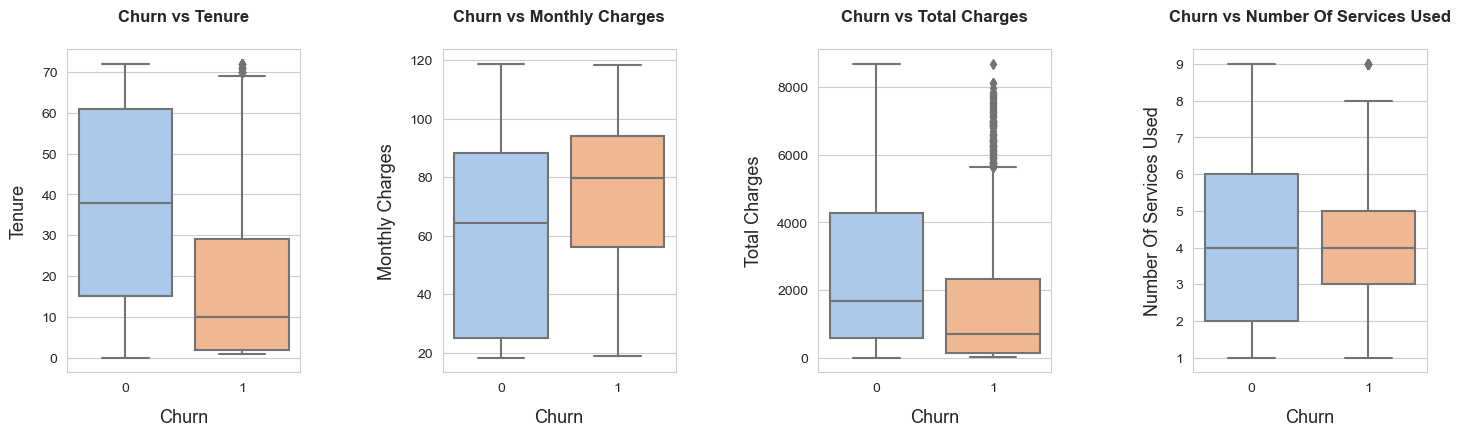

In [58]:
# Preliminary plotting: calling the second plotting function to plot all the discrete variables against churn for a general overview:
discrete_variables_against_churn(discrete_variables, data)

##### **Intermediate conclusion**: plotting the discrete variables showed both median and spread differences for all of them (except for the Number of Services Used with no median difference). There are quite a few outliers for customers churning with high total charges, which already suggests that there might be customer dissatisfaction among older customers (in terms of time) who decide to move to other companies. These variables will be explored further below, after the binary variables.

#### Plotting the selected number of binary variables against `churn`, removing the uninteresting variables:
- ##### Only those with the difference in churn rates of at least 10% between their values were selected
- ##### *Comment*: All the variables with such a difference have a HIGHER correlation with churn than the discarded ones, which is reasonable

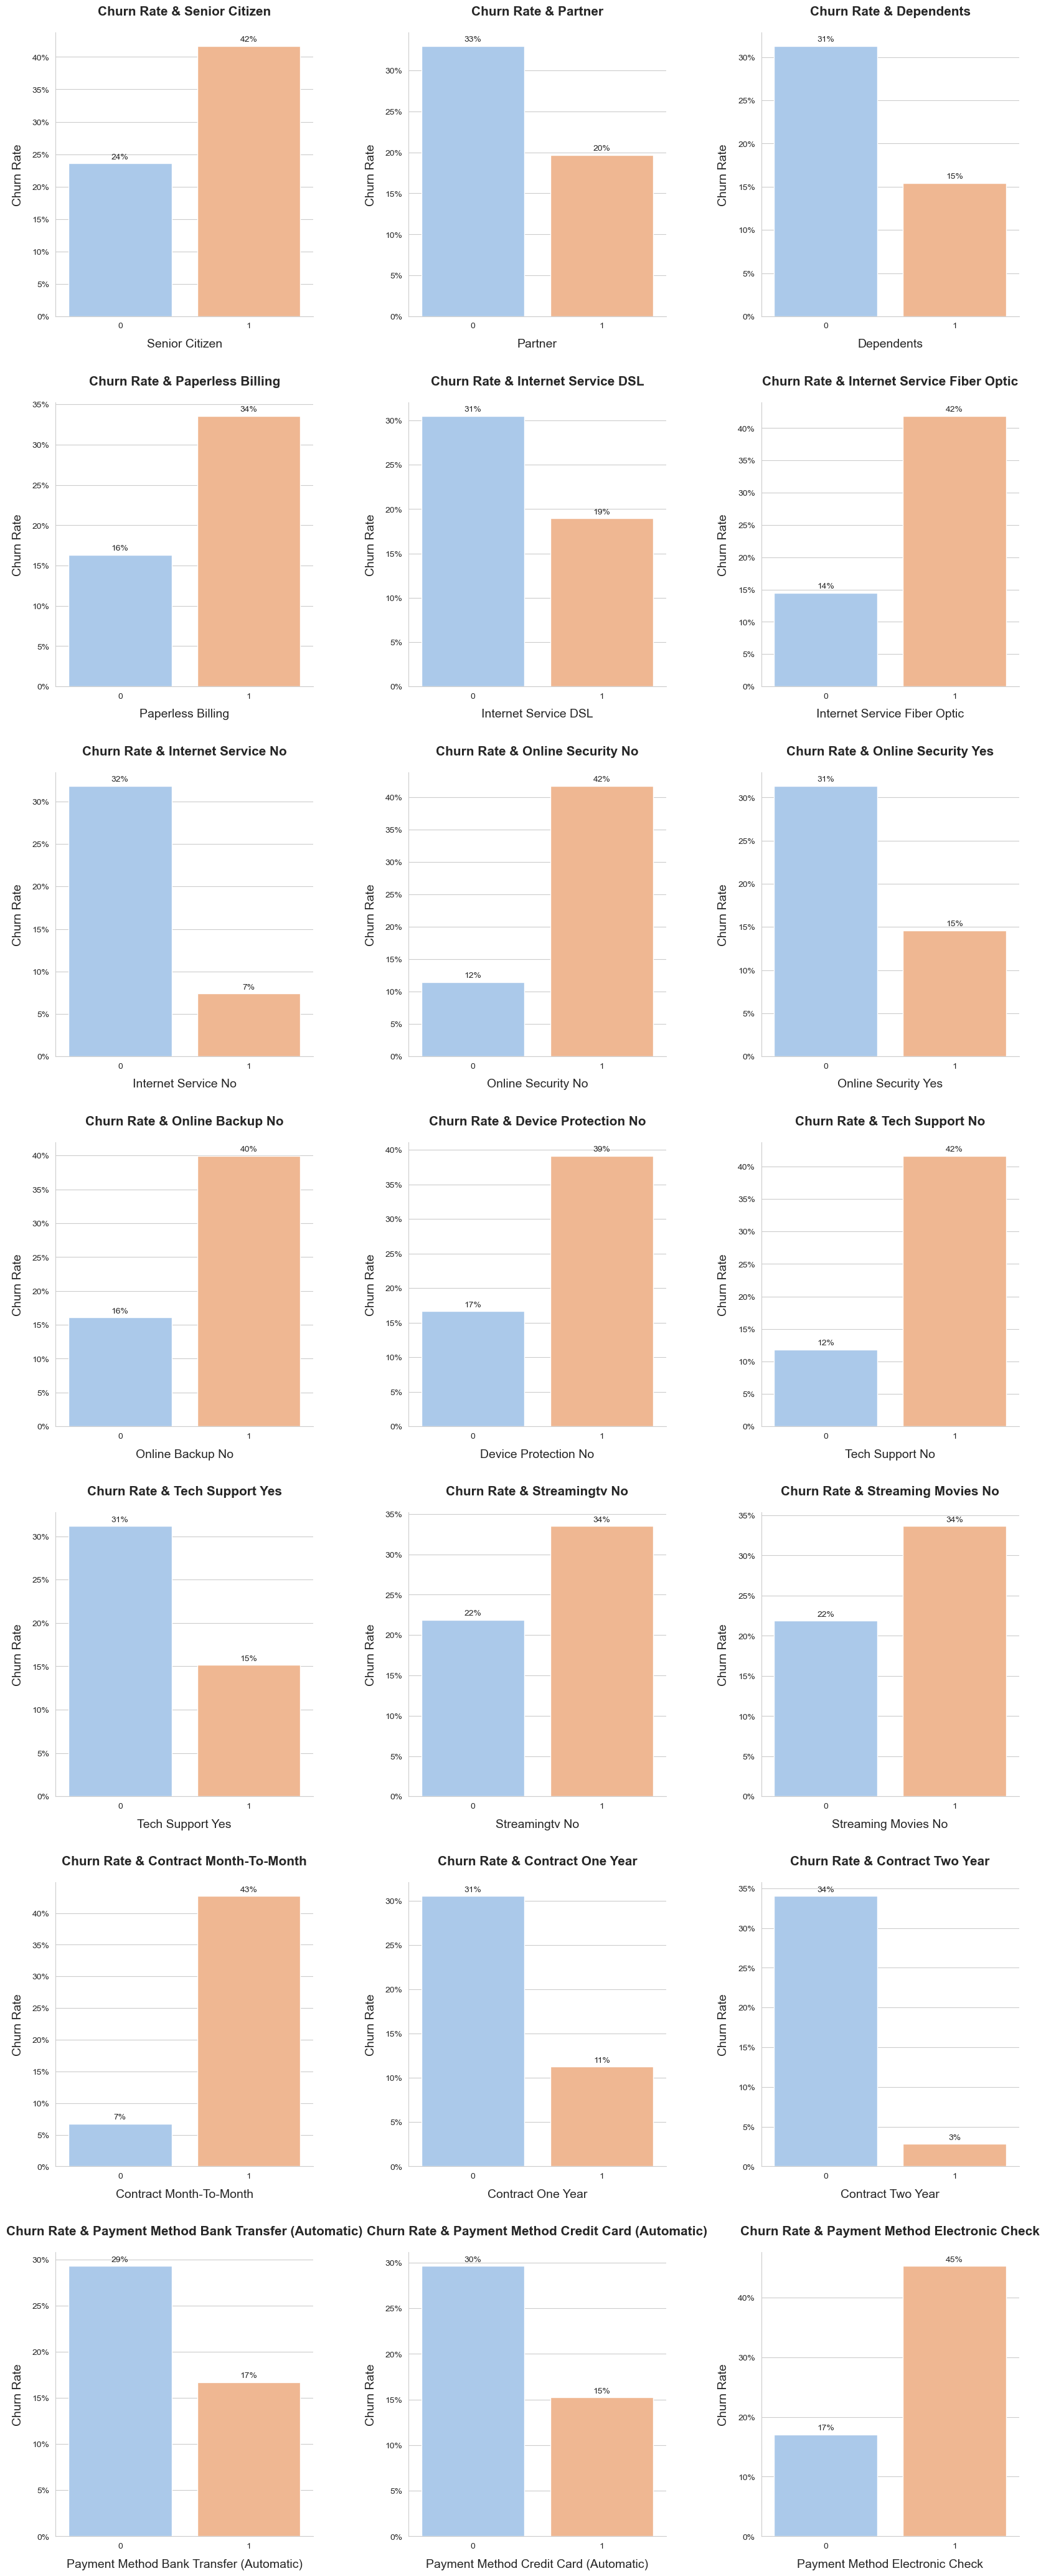

In [59]:
churn_rates_dict = {}
for column in binary_variables:
    churn_rate = data.groupby(column)['Churn'].value_counts(normalize=True).unstack()[1]
    churn_rates_dict[column] = churn_rate

# Determining the variables with at least 10% difference in churn rate:
significant_binary_variables = []
for column, churn_rate in churn_rates_dict.items():
    if churn_rate.size == 2 and abs(churn_rate.iloc[0] - churn_rate.iloc[1]) >= 0.1:
        significant_binary_variables.append(column)

# Calling the plotting function with no interaction:
binary_variables_against_churn(significant_binary_variables, data)

In [60]:
# Calling the plotting function with interaction for the selected binary variables:
binary_variables_against_churn_interactive(significant_binary_variables, data, 8052)

##### In addition to the bar plots, the code below will sort the difference and the ratio between churn rates for each binary variable by its absolute value to **show which variables have the highest churn rate differences**. An increase in churn will be highlighted in red and a decrease – in green (because a decrease in churn is good).

In [61]:
# Creating a new data frame to represent the graphs with proportions with the churn rate difference and ratio:
churn_rate_table_difference = pd.DataFrame(columns=["No", "Yes", "Difference"])
churn_rate_table_ratio = pd.DataFrame(columns=["No", "Yes", "Ratio"])

# Looping through the churn rates dictionary to add the significant binary variables to the table with the corresponding values
for variable, rates in churn_rates_dict.items():
    # Calculating the difference and then the ratio
    # Adding a '-' before the ratio when churn decreases for the given feature for subsequent coloring purposes only
    difference = rates.iloc[1] - rates.iloc[0]
    ratio = rates.iloc[1] / rates.iloc[0] if rates.iloc[1] > rates.iloc[0] else -(rates.iloc[0] / rates.iloc[1])
    if abs(difference) >= 0.1:
        churn_rate_table_difference.loc[format_variable_names(variable)] = [rates.iloc[0], rates.iloc[1], difference]
        churn_rate_table_ratio.loc[format_variable_names(variable)] = [rates.iloc[0], rates.iloc[1], ratio]

# Sorting by the absolute value of the difference and ratio
churn_rate_table_difference_sorted = churn_rate_table_difference.sort_values(by="Difference", key=lambda x: x.abs(), ascending=False)
churn_rate_table_ratio_sorted = churn_rate_table_ratio.sort_values(by="Ratio", key=lambda x: x.abs(), ascending=False)

# For highlighting the difference/ratio cells based on their value: the decrease in churn rate in green, the increase – in red
def color_difference(val):
    if val < 0:
        color = 'green'
    else:
        color = 'red'
    return f'color: {color}'

# Applying the color_difference function to the Difference column
difference_table_with_highlights = churn_rate_table_difference_sorted.style.applymap(color_difference, subset=['Difference'])\
                                            .format("{:.2f}")
ratio_table_with_highlights = churn_rate_table_ratio_sorted.style.applymap(color_difference, subset=['Ratio'])\
                                            .format("{:.2f}", subset=['No', 'Yes'])\
                                            .format(lambda x: f"{abs(x):.2f}", subset=['Ratio'])

# Using the HTML display defined above to display the DataFrames side by side
display('difference_table_with_highlights','ratio_table_with_highlights')

,No,Yes,Difference
Contract Month-To-Month,0.07,0.43,0.36
Contract Two Year,0.34,0.03,-0.31
Online Security No,0.12,0.42,0.30
Tech Support No,0.12,0.42,0.30
Payment Method Electronic Check,0.17,0.45,0.28
Internet Service Fiber Optic,0.14,0.42,0.27
Internet Service No,0.32,0.07,-0.24
Online Backup No,0.16,0.40,0.24
Device Protection No,0.17,0.39,0.22
Contract One Year,0.31,0.11,-0.19


##### **⭐️ Insights ⭐️**: The graphs (visually) and the numbers in the tables above show how considerable the churn rate differences are for the examined variables. Most important conclusions:
**Contract type**
- We see that clients with a **month-to-month** contract have a **36 percentage points higher churn rate** than with a different contract and are **6.3 times more likely to churn**.
- Clients with a **two-year** contract have a **31 percentage points lower churn rate** than with a different contract and are **12 times less likely to churn**. 
- Clients with a **one-year** contract have a **19 percentage points lower churn rate** than with a different contract and are **2.7 times less likely to churn**. 
> ***Conclusion***: possibly, encouraging longer contracts by offering discounts or other benefits, for example, could help keep more customers in the company.

**Internet Services**
- Clients **with fiber optic internet service** have a **27 percentage points higher churn rate** compared to those without it and are **2.9 times more likely to churn**.
- Clients **without any internet service** have a **24 percentage points lower churn rate** and are **4.3 times less likely to churn**.
- Clients **with DSL** as their internet service have a **12 percentage points lower churn rate** and are **1.61 times less likely to churn**.
> ***Conclusion***: surprisingly, people with no internet services are less likely to churn, whereas people with fiber-optic internet are more likely to churn. The company should look into its internet services –  it is possible that their quality does not align with customer expectations?

**Additional Services**
- Customers **without Tech Support** show a **30 percentage points higher churn rate** than those with support and are **3.5 times more likely to churn**.
- Customers **without Online Security** have a **30 percentage points higher churn rate** than those with the service and are **3.6 times more likely to churn**.
- Customers **without Online Backup** are at a **24 percentage points higher churn rate** than those with the service and are **2.5 times more likely to churn**.
- Customers **without Device Protection** face a **22 percentage points higher churn rate** than those with the service and are **2.4 times more likely to churn**.
- Customers **without Streaming Movies or Streaming TV subscriptions** have a **12 percentage points higher churn rate** and are **1.5 times more likely to churn**.
> ***Conclusion***: people without any of the additional services are more likely to churn, so these services should be encouraged. They could be offered for free for a particular period of time or bundled if the customer signs a longer contract.

**Payment Methods**
- Clients using **electronic check** as a payment method exhibit a **28 percentage points higher churn rate** than those using other methods and are **2.7 times more likely to churn**.
- Clients who engage in **Paperless Billing** are at a **17 percentage points higher churn rate** than those who do not and are **2.1 times more likely to churn**.
- Conversely, clients **with automatic credit card payments** see a **14 percentage points lower churn rate** and are **2 times less likely to churn**.
- Similarly, those **with automatic bank transfers** have a **13 percentage points lower churn rate** and are **1.8 times less likely to churn**.
> ***Conclusion***: encouraging more payment automatization should be considered to make the payment process faster and smoother.

**Customer Demographics**
- **Senior Citizens** have an **18 percentage points higher churn rate** than non-senior citizens and are **1.8 times more likely to churn**.
- **Customers with dependents** have a **16 percentage points lower churn rate** that than those without dependents are are **2 times less likely to churn**.
- **Customers with a partner** have a **13 percentage points lower churn rate** that than those with without one are are **1.7 times less likely to churn**.
> ***Conclusion***: it would be recommended to look deeper into the characteristics and needs of single clients, those without dependents, and older people to adapt the product offerings accordingly.


#### **Further analysis of each discrete variable**

##### Plotting the `tenure` against `Churn`

In [62]:
def plot_churn_rate_by_discrete_variable(variable, data):
    """
    This function plots a discrete variable against churn 
    Args:
        variable: the discrete variable to plot
        data: the DataFrame with the data for analysis
    Returns:
        None, because the function's purpose is to output a plot/plots
    """
    formatted_name = format_variable_names(variable)
    churn_rates = data.groupby(variable)['Churn'].mean()
    fig = go.Figure(data=[
        go.Bar(
            x=churn_rates.index,
            y=churn_rates.values,
            marker=dict(
                color=churn_rates.values,  # Assigning a color to each bar based on its y-value
                colorscale='YlOrRd',  # Using the 'yellow-red' sequential colorscale
                showscale=False  # Not showing the color scale bar
            ),
            hoverinfo='y',  # Showing the churn rate on hover
        hovertemplate=f'<b>{formatted_name}: %{{x}}</b><br><b>Churn Rate: %{{y:.2%}}</b><extra></extra>'  # Customizing the hover template
        )
    ])

    fig.update_layout(
        title=f'<b>Churn Rate & {formatted_name}</b>',  # Setting the title bold
        xaxis_title=f'<b>{formatted_name}</b>',  # Setting the x-axis title bold 
        yaxis_title='<b>Churn Rate</b>',  # Y-axis title with bold formatting
        plot_bgcolor='white',  # Setting the background color to white
    )

    fig.show()

In [63]:
plot_churn_rate_by_discrete_variable('tenure', data)

##### **⭐️ Insight ⭐️**: There is a clear trend showing that customers who have been with the company for a longer time are less likely to churn than more recent ones. However, the churn rate between 15 and 25% that appears quite often among customers with longer tenure is still quite high, which suggests that many even loyal customers have reasons to leave.

##### Plotting `Number_of_Services_Used` against `Churn`

In [64]:
plot_churn_rate_by_discrete_variable('Number_of_Services_Used', data)

##### **⭐️ Insight ⭐️**: This graph shows that customers with 3 services are the most likely to churn, and this tendency decreases with a higher number of services. Therefore, more services should be encouraged: for example, through bundling.

##### Plotting `MonthlyCharges` against `Churn`

In [65]:
def categorize_discrete_variables_into_intervals(variable, data, bin_num):
    """
    This function bins a continuous variable into a specified number of intervals of approximately EQUAL SIZE
        We tried binning into equal-width intervals first but the number of observations was disproportionate and could lead to unrepresentative churn rates
        Equal bins should be considered if the company has particular price tiers that should be examined, for example
        This can be done by replacing `qcut` with `cut` and the `q` parameter with `bins`
    Args:
        variable: the continuous variable to categorize
        data: the DataFrame with the data for analysis
        bin_num: the number of bins to be used
    Returns:
        data with the new categorized column
    """
    # Cutting the data int the specified number of bins
    data[f'{variable}Categories'] = pd.qcut(data[variable], q=bin_num)
    
    # Generating labels for the bins in the format [lower limit]-[upper limit]
    bin_labels = [
        f"{interval.left:.2f}-{interval.right:.2f}" 
        for interval in data[f'{variable}Categories'].cat.categories
    ]

    # Assigning these labels to the bins
    data[f'{variable}Categories'] = pd.qcut(
        data[variable],
        q=bin_num,
        labels=bin_labels
    )
    return data 

In [66]:
categorize_discrete_variables_into_intervals('MonthlyCharges',data, 10)
plot_churn_rate_by_discrete_variable('MonthlyChargesCategories', data)

##### **⭐️ Insight ⭐️**: This graph shows that customers who pay more than 70.35 a month are generally more likely to churn. Regardless of whether it is related to the number of services they use, customers possibly do not extract enough value from them for the price they are paying. Therefore, the company should consider reevaluating the pricing strategy for its services, (once again) bundling them and/or providing discounts.

##### Plotting `TotalCharges` against `Churn`

In [67]:
categorize_discrete_variables_into_intervals('TotalCharges',data, 10)
plot_churn_rate_by_discrete_variable('TotalChargesCategories', data)

##### **⭐️ Insight ⭐️**: This graph resembles that of Tenure against Churn: it looks like customers who have already paid a lot of money for the company's services, are more likely to stay with the company. The company could consider loyalty programs and think of additional benefits for older (in terms of time) and higher-spending customers, as well as discourage newer ones from churning, for instance by providing free or discounted trials. 

##### **⭐️ General Advice ⭐️**: In order to choose the best measures to reduce churn, the company should:
- ##### Collect and analyze **customer feedback** which is not currently collected, especially from the customers who leave 
- ##### Reevaluate the **price-quality balance** for its services to make sure customers are paying a fair price for all the services